In [5]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from sklearn.metrics import accuracy_score
from keras.models import load_model
import matplotlib.pyplot as plt

C:\Users\pzaya\AppData\Local\Temp\ipykernel_24608\2462808750.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [11]:
test_path = "./dataset/"
Y_test = pd.read_csv(test_path + "Test.csv")
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

output = list()
for img in test_images:
    image = load_img(os.path.join(test_path, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)

# load model
model = load_model('./model/traffic_classifier.h5')
pred = model.predict(X_test)
#Accuracy with the test data
print('Test Data accuracy: ', accuracy_score(test_labels, np.argmax(pred, axis=1))*100)

395/395 [==============================] - 2s 5ms/step
Test Data accuracy:  92.05859065716548


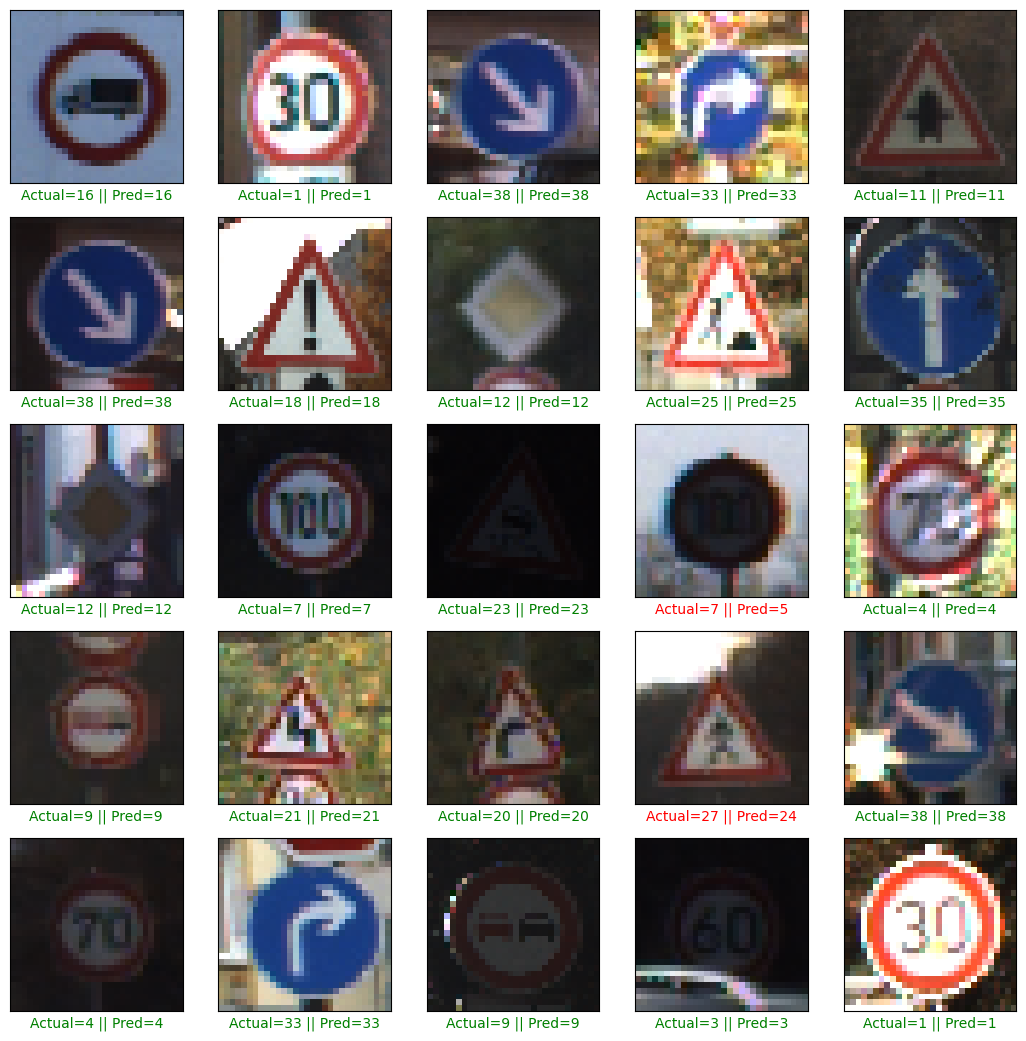

In [8]:
plt.figure(figsize = (13, 13))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = np.argmax(pred, axis=1)[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()